<a href="https://colab.research.google.com/github/spreadzp/ml-price-predictor/blob/master/fashion_mnist_dense.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Распознавание моделей одежды с помощью Keras

Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

Учебный курс "[Программирование глубоких нейронных сетей на Python](https://www.asozykin.ru/courses/nnpython)".

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

## Подготовка данных для обучения сети

**Загружаем набор данных**

In [2]:
# В Keras встроены средства работы с популярными наборами данных
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Список с названиями классов

In [0]:
classes = ['футболка', 'брюки', 'свитер', 'платье', 'пальто', 'туфли', 'рубашка', 'кроссовки', 'сумка', 'ботинки']

Просматриваем примеры изображений

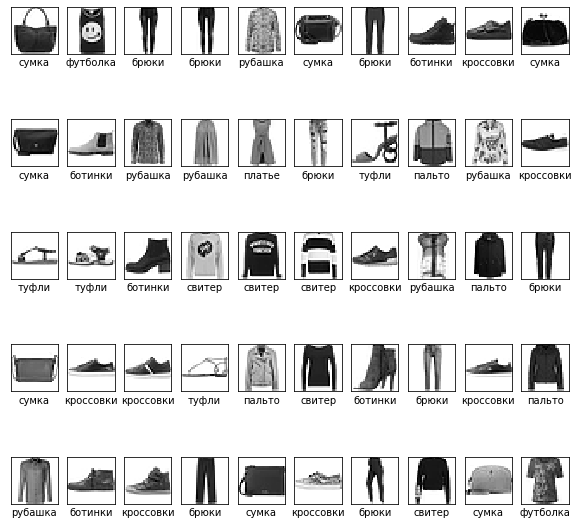

In [4]:
plt.figure(figsize=(10,10))
for i in range(100,150):
    plt.subplot(5,10,i-100+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])

**Преобразование размерности данных в наборе**

In [0]:
x_train = x_train.reshape(60000, 784)

**Нормализация данных**

In [0]:
# Векторизованные операции
# Применяются к каждому элементу массива отдельно
x_train = x_train / 255 

**Работа с правильными ответами**

Просматриваем пример правильного ответа

In [7]:
print(y_train[0])

9


**Преобразуем метки в формат one hot encoding**

In [0]:
y_train = utils.to_categorical(y_train, 10)

**Правильный ответ в формате one hot encoding**

In [9]:
print(y_train[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


## Создаем нейронную сеть

**Описываем архитектуру нейронной сети**

In [10]:
# Создаем последовательную модель
model = Sequential()
# Входной полносвязный слой, 800 нейронов, 784 входа в каждый нейрон
model.add(Dense(800, input_dim=784, activation="relu"))
# Выходной полносвязный слой, 10 нейронов (по количеству рукописных цифр)
model.add(Dense(10, activation="softmax"))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


**Компилируем сеть**

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="SGD", metrics=["accuracy"])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               628000    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                8010      
Total params: 636,010
Trainable params: 636,010
Non-trainable params: 0
_________________________________________________________________
None


## Обучаем нейронную сеть

In [12]:
model.fit(x_train, y_train, 
          batch_size=200, 
          epochs=100,  
          verbose=1)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 2s 28us/sample - loss: 1.1438 - acc: 0.6586
Epoch 2/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.7245 - acc: 0.7742
Epoch 3/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.6312 - acc: 0.8008
Epoch 4/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5819 - acc: 0.8144
Epoch 5/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5497 - acc: 0.8232
Epoch 6/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.5271 - acc: 0.8282
Epoch 7/100
60000/60000 [==============================] - 1s 14us/sample - loss: 0.5102 - acc: 0.8321
Epoch 8/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4962 - acc: 0.8350
Epoch 9/100
60000/60000 [==============================] - 1s 15us/sample - loss: 0.4849 - acc: 0.8378
Epoch 10/100
60000/60000 [========================

## Используем сеть для распознавания моделей одежды

**Запускаем распознавание набора данных, на котором обучалась сеть**

In [0]:
predictions = model.predict(x_train)

**Проверяем качество распознавания**

Просматриваем пример изображения

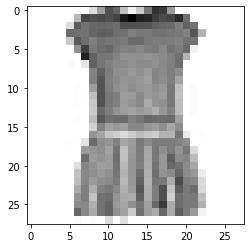

In [18]:
# Меняйте значение n чтобы просмотреть результаты распознавания других изображений
n = 3
plt.imshow(x_train[n].reshape(28, 28), cmap=plt.cm.binary)
plt.show()

Данные на выходе из сети в формате one-hot-encoding

In [19]:
print(predictions[n])

[2.87138820e-01 1.01346765e-02 6.90467516e-03 4.03954029e-01
 6.68511551e-04 2.70752196e-07 2.90462047e-01 3.15771194e-06
 7.33731198e-04 1.78799851e-07]


Определяем номер класса изображения, который предлагает сеть

In [20]:
np.argmax(predictions[n])

3

Печатаем название класса

In [21]:
classes[np.argmax(predictions[n])]

'платье'

Печатаем номер класса правильного ответа

In [22]:
np.argmax(y_train[n])

3

Печатаем название класса правильного ответа

In [23]:
classes[np.argmax(y_train[n])]

'платье'